In [215]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

In [4]:
data_dir = 'data'

with open(os.path.join(data_dir, 'divorce.csv')) as clean_data_file:
    data = pd.read_csv(clean_data_file, delimiter=';')

In [116]:
# split the data into train and test sets.

X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=30)

# SVM

SVMs are supervised learning methods used for classification, regression and outlier detection. They have high effieicency when working with high dimentional spaces. They also have high efficiency for memory using, because they only use a subset of traning points in the decision vector.




In [117]:
clf = svm.SVC(kernel = "linear")
clf.fit(X_train,y_train)   
np.sum(clf.predict(X_test) == y_test)/len(y_test)

0.9607843137254902

## Tuning Parameters: Kernel Parameters

The two important parameters, when we train an SVM with the Radial Basis Funtion (rbf) are "c" and "gamma".
The "c" parameter trades off misclassification of training examples against simplicity of the decision surface.In other words, c behaves as a regularization parameter in the SVM. Small "c" will lead to a smooth decision surface, while large "c" try to give every sample a correct classification. The "gamma" parameter can be treated as the inverse of the radius of influence of samples selected by the model as support vectors. When this parameter is small, the influence of a single training sample reach is far, and when this value is large, the effect becomes closer.

It is very important to select a proper values for "c" and "gamma", here we tune this two parameters to see how the test accuracy change.

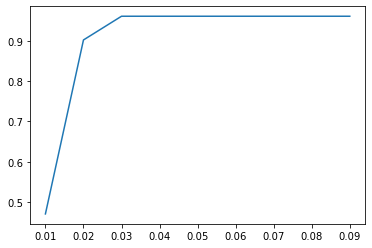

In [198]:
C_range = np.arange(0.01,0.1,1e-2)
svc_rbf_c = []
for C in C_range:
    clf = svm.SVC(C=C)
    clf.fit(X_train,y_train)
    svc_rbf_c.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))

plt.plot(C_range, svc_rbf_c)

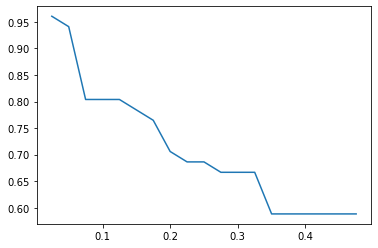

In [199]:

gamma_list = np.arange (1/40,1/2,1/40)
svm_rbf_gamma = []
for i in (gamma_list):
    
    clf = svm.SVC(kernel = "rbf",gamma = i)
    clf.fit(X_train,y_train)   
    svm_rbf_gamma.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))
    
plt.plot(gamma_list, svm_rbf_gamma)

In [128]:
clf = svm.SVC(kernel = "sigmoid")
clf.fit(X_train,y_train)   
np.sum(clf.predict(X_test) == y_test)/len(y_test)

0.3333333333333333

In [166]:
clf = svm.SVC(kernel = 'poly',coef0=0.1,degree=0.3)
clf.fit(X_train,y_train)   
np.sum(clf.predict(X_test) == y_test)/len(y_test)

0.47058823529411764

# Random Forest

The random forest improve the predicted accuracy and avoid over-fitting by fitting a number of decision trees on different subsets of the data and averaging the results.

In [98]:

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size = 0.3, random_state = 30)
    
   

In [99]:
clf = RandomForestClassifier(bootstrap = False, random_state = 30)
clf.fit(X_train,y_train)
np.sum(clf.predict(X_test) == y_test)/len(y_test)

0.9607843137254902

## Tuning Parameters: max_samples

Here we tune the sub sample size by changing the max_samples parameters

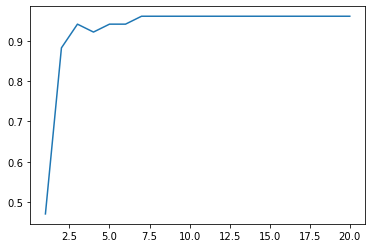

In [201]:
max_samples_par = []
max_sample_range = np.arange (1,21,1)
for i in max_sample_range:
    clf = RandomForestClassifier(max_samples = i,random_state = 30)
    clf.fit(X_train,y_train)
    max_samples_par.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))

plt.plot(max_sample_range,max_samples_par)

## Tuning Parameters: n_estimators

The number of trees in the forest. 

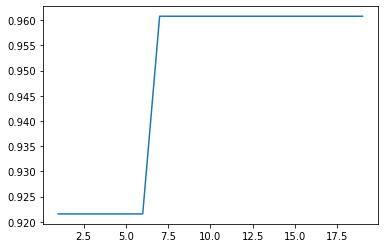

In [209]:
max_n_estimator_par = []
max_n_estimator_range = np.arange (1,20,1)
for i in max_n_estimator_range:
    clf = RandomForestClassifier(n_estimators = i,random_state = 30)
    clf.fit(X_train,y_train)
    max_n_estimator_par.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))

plt.plot(max_n_estimator_range,max_n_estimator_par)

# XGBoost

The full name of XGBoost is “eXtreme Gradient Boosting.” The "eXtreme" refers to the improvement of speed. The parallel computing and cache awareness makes XGBoost almost ten times faster than the traditional Gradient Boost.For Gradient Boosting. The trainning samples which do not get good result in the previous models will have higher weight to be selected in the following traning model, which enable the weak learner to be trained into a strong learner.

In [210]:
conda install -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/hp/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    conda-4.11.0               |   py38h578d9bd_0        16.9 MB  conda-forge
    libxgboost-1.5.0           |       h295c915_1         2.0 MB
    py-xgboost-1.5.0           |   py38h06a4308_1         163 KB
    xgboost-1.5.0              |   py38h06a4308_1          25 KB
    ------------------------------------------------------------
                                           Total:        19.0 MB

The following NEW packages will be INSTALLED:

  _openmp_mu

In [211]:
import xgboost as xgb

In [220]:
#xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, label_encoder = False)
xgb_model = xgb.XGBClassifier(n_estimators = 100, random_state=42,label_encoder = False)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:14] WARNING: ../src/learner.cc:576: 
Parameters: { "label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:34:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[24  0]
 [ 2 25]]
0.9607843137254902


In [25]:
display(df.describe())

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,1.688235,1.652941,1.835294,1.570588,1.570588,1.476471,1.652941,1.517647,1.641176,1.458824,1.388235,1.247059,1.411765,1.511765,1.629412,1.488235,1.400000,1.305882,1.494118,1.494118,2.123529,2.058824,1.805882,1.900000,1.670588,1.605882,2.088235,1.858824,2.088235,1.870588,1.994118,2.158824,2.705882,1.941176,2.458824,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,1.647082,1.468654,1.478421,1.502765,1.506697,1.504246,1.614512,1.565998,1.641027,1.554173,1.452149,1.446529,1.612041,1.504385,1.530079,1.500447,1.457078,1.467788,1.592315,1.504420,1.646955,1.623445,1.785202,1.630515,1.842228,1.798412,1.716051,1.734802,1.719496,1.796039,1.721761,1.574034,1.348447,1.684267,1.499925,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.500000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.500000,0.000000,2.000000,1.000000,2.000000,1.500000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000

In [28]:
df.to_numpy()

array([[2, 2, 4, ..., 2, 1, 1],
       [4, 4, 4, ..., 2, 2, 1],
       [2, 2, 2, ..., 2, 2, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 1, 0],
       [0, 0, 0, ..., 3, 1, 0]])